In [1]:
import warnings
warnings.filterwarnings('ignore')

# GeoPandas で 空間分析と可視化

## GeoPandas 

- `Pandas`の拡張パッケージで、地理空間データを含む情報を扱うことができます。
- GISフォーマットのシェープファイルやGeoJSON形式の読み込みや書き出しが可能。
- 空間演算を行うことができます。



### モジュールをインポートする

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

%matplotlib inline

### 必要なデータを読み込む

In [3]:
# 駅のデータ（CSV形式） を読み込む
df_station = gpd.read_file("../data/machida/station.csv")

In [4]:
# 東京都の市区町村データ（シェープファイル） を読み込む。
df_cities = gpd.read_file("../data/machida/cities/cities.shp", encoding='shift-jis')

In [5]:
# 市区町村のデータフレームを確認する。
df_cities.head()

,pref,area2,area,city,citycode,geometry
0,東京都,None,None,千代田区,13101,"POLYGON ((139.77287 35.70370, 139.77279 35.703..."
1,東京都,None,None,中央区,13102,"POLYGON ((139.78341 35.69645, 139.78459 35.696..."
2,東京都,None,None,港区,13103,"POLYGON ((139.77129 35.62841, 139.77128 35.628..."
3,東京都,None,None,港区,13103,"POLYGON ((139.76689 35.62774, 139.76718 35.627..."
4,東京都,None,None,港区,13103,"POLYGON ((139.77022 35.63199, 139.77046 35.631..."


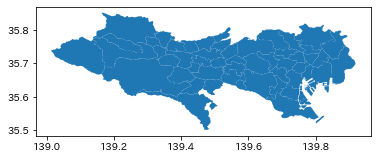

In [6]:
# 市区町村データフレームを描写する。
df_cities.plot()

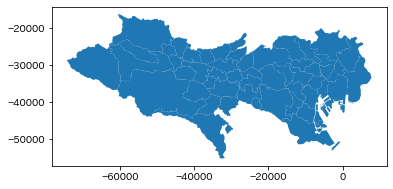

In [7]:
# 座標参照系（CRS）を、平面直角座標系９系（JGD2011）へ変換する。
df_cities = df_cities.to_crs(epsg=6677)
df_cities.plot()

In [8]:
#　町田市を取り出す
machida = df_cities.loc[df_cities['city'] == '町田市', 'geometry'].squeeze()

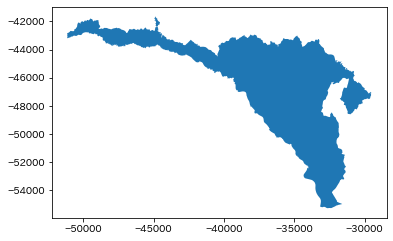

In [9]:
# 描写する
gpd.GeoSeries([machida]).plot()

In [10]:
# 駅のデータを確認する。
ｄf_station.head()

,施設名,施設名ふりがな,緯度,経度,EPSGコード,geometry
0,JR相原駅,じぇいあーるあいはらえき,35.606865,139.331665,EPSG:4326,None
1,京王多摩境駅,けいおうたまさかいえき,35.6016906,139.3655455,EPSG:4326,None
2,JR町田駅,じぇいあーるまちだえき,35.544402,139.445559,EPSG:4326,None
3,小田急町田駅,おだきゅうまちだえき,35.5440613,139.4429512,EPSG:4326,None
4,小田急玉川学園前駅,おだきゅうたまがわがくえんまええき,35.5634993,139.4612247,EPSG:4326,None


In [11]:
# データ型を確認する。
ｄf_station.dtypes

施設名           object
施設名ふりがな       object
緯度            object
経度            object
EPSGコード       object
geometry    geometry
dtype: object

In [12]:
# カラム名を変更する。
df_station.columns = ['name', 'furigana', 'Y', 'X', 'epsg', 'geometry']

In [13]:
# データ型をfloatに変更する。
var_lst = ['X','Y']
df_station[var_lst] = df_station[var_lst].astype(float)    

In [14]:
# データ型の確認。
ｄf_station.dtypes

name          object
furigana      object
Y            float64
X            float64
epsg          object
geometry    geometry
dtype: object

In [26]:
# 緯度経度情報からをポイントを作成する。
gdf_station = gpd.GeoDataFrame(
    df_station.drop(['X', 'Y', 'epsg'], axis=1),
    crs={'init': 'epsg:4326'}, # 座標系を指定する（緯度経度）
    geometry=[Point(xy) for xy in zip(df_station.X, df_station.Y)])

In [16]:
gｄf_station

,name,furigana,geometry
0,JR相原駅,じぇいあーるあいはらえき,POINT (139.33166 35.60686)
1,京王多摩境駅,けいおうたまさかいえき,POINT (139.36555 35.60169)
2,JR町田駅,じぇいあーるまちだえき,POINT (139.44556 35.54440)
3,小田急町田駅,おだきゅうまちだえき,POINT (139.44295 35.54406)
4,小田急玉川学園前駅,おだきゅうたまがわがくえんまええき,POINT (139.46122 35.56350)
5,小田急鶴川駅,おだきゅうつるかわえき,POINT (139.47951 35.58350)
6,JR成瀬駅,じぇいあーるなるせえき,POINT (139.47072 35.53552)
7,東急つくし野駅,とうきゅうつくしのえき,POINT (139.48250 35.52775)
8,東急すずかけ台駅,とうきゅうすずかけだいえき,POINT (139.47925 35.51692)
9,東急南町田駅,とうきゅうみなみまちだえき,POINT (139.46780 35.51127)


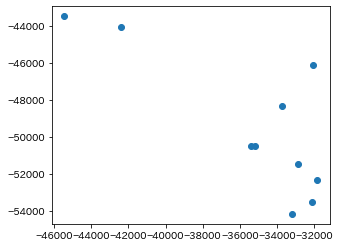

In [17]:
# 座標系を変換
gdf_station = gdf_station.to_crs(epsg=6677)
gdf_station.plot()

In [18]:
# 町田駅を取り出す。（フィルタリング）
station_machida = gｄf_station.loc[gｄf_station['name'] == 'JR町田駅', 'geometry'].squeeze()

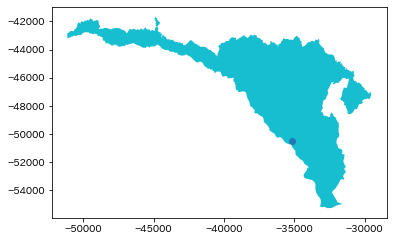

In [19]:
# 描写する。
gpd.GeoSeries([station_machida, machida]).plot(cmap='tab10')

## 空間演算

In [20]:
# 空間演算する。町田駅は町田市に含まれるか？
station_machida.within(machida)

True

In [21]:
# 町田市は町田駅を含むか？
machida.contains(station_machida)

True

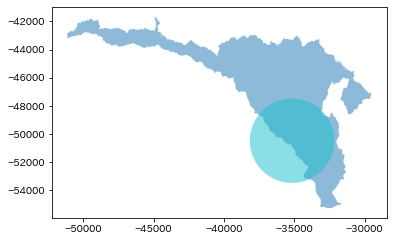

In [22]:
# 町田駅から3kmのバッファを描写する
gpd.GeoSeries([machida, station_machida.buffer(3000)]).plot(alpha=0.5, cmap='tab10')

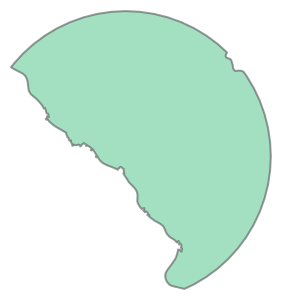

In [23]:
# バッファでインターセクト（重なりの抽出）する。
station_machida.buffer(3000).intersection(machida)

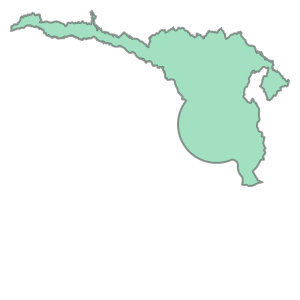

In [24]:
# 結合（Union）する。
station_machida.buffer(3000).union(machida)

### 駅から3km以内のエリアを描写

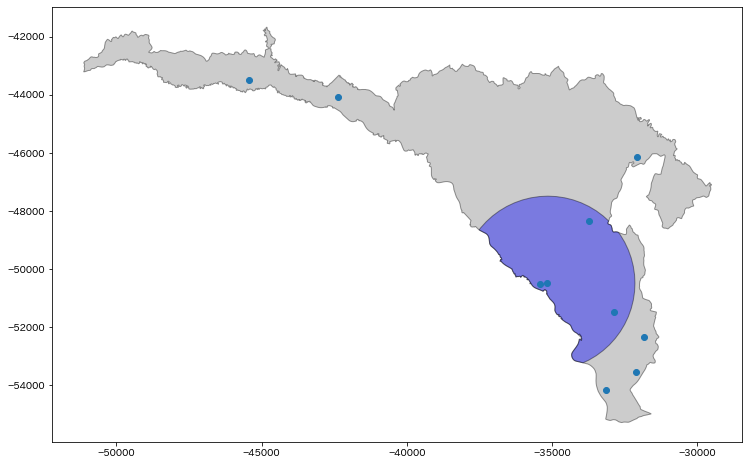

In [25]:
station_buf = station_machida.buffer(3000).intersection(machida)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
gpd.GeoSeries([machida]).plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
gpd.GeoSeries([station_buf]).plot(ax=ax, color='blue', alpha=0.4, edgecolor='k')
gdf_station.plot(ax=ax)